## Análisis de ventas semanal vs el incremento de casos de COVID-19 registrados en la ciudad de Hermosillo, Sonora. (periodo Enero a Septiembre 2020).

El presente análisis es sobre la comparación de las ventas por Familia-Departamento en una empresa con enfoque de comida rápida vs el incremento de casos confirmados de COVID-19 en la ciudad de Hermosillo, Sonora. En el periodo de enero a septiembre de 2020.

Se comparara las ventas en piso/pedido-telefónico semanales vs el número de casos confirmados positivos de COVID-19.

Se comparara las ventas mensuales en UBER vs el número de casos confirmados positivos de COVID-19.

### Diccionario de datos

####                  Archivo: Venta_Dia_Fam_Dep_2020 y Conf_Hmo_2020.csv (https://datos.covid-19.conacyt.mx/#DownZCSV)
		
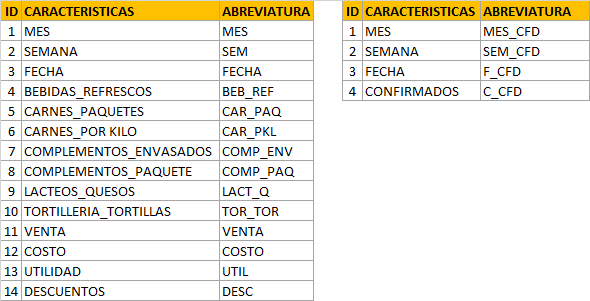

### Análisis Exploratorio de datos del archivo Ventas en piso/atención telefónica

In [3]:
#Se cargan librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#General Plot Settings

#Estilo de hoja
plt.style.use('seaborn-paper')

#background in plots
c_background = '#FFFFFF'

#color for the XYZ planes for the 3d plots
rgba_planes = (231/255, 231/255, 231/255)

%matplotlib inline

In [4]:
#import the csv as a Data Frame
Ventas_df = pd.read_csv('Venta_Dia_Fam_Dep_2020.csv', encoding='ISO-8859-1')
Ventas_df.head(10)

,MES,SEM,FECHA,BEB_REF,CAR_PAQ,CAR_PKL,COMP_ENV,COMP_PAQ,LACT_Q,TOR_TOR,VENTA,COSTO,UTIL,DESC
0,1,1,01/01/2020,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000
1,1,1,02/01/2020,8.0,16.0,19.60570,17.0,2.0,1.0,8.0,9635.64470,4877.056060,4768.588640,0.000
2,1,1,03/01/2020,5.0,9.0,7.55000,7.5,NaN,NaN,5.0,4361.45000,2221.776000,2139.674000,0.000
3,1,1,04/01/2020,12.0,8.0,35.99762,31.0,NaN,1.0,20.0,11180.23118,5302.936400,5877.294780,0.000
4,1,1,05/01/2020,16.0,17.0,53.04634,49.0,NaN,3.0,44.0,19168.84426,9682.981650,9485.862610,28.595
5,1,2,06/01/2020,4.0,6.0,9.25500,28.5,NaN,NaN,14.0,5184.39500,2711.237275,2473.157725,0.000
6,1,2,07/01/2020,3.0,1.0,10.25409,10.0,NaN,1.0,4.0,2776.88631,1379.147558,1397.738752,0.000
7,1,2,08/01/2020,2.0,8.0,19.00682,15.0,NaN,NaN,9.0,7805.55998,3714.728900,4090.831080,3.870
8,1,2,09/01/2020,6.0,10.0,12.99341,17.5,4.0,NaN,9.0,6082.47499,3036.443375,3068.031615,0.000
9,1,2,10/01/2020,4.0,2.0,14.62201,15.0,2.0,NaN,8.0,4425.48949,2179.439640,2257.849850,0.000


### Observaciones Generales

Esta sección proporcionará una descripción general de los datos, las estadísticas centrales y sus distribuciones.

In [5]:
#number of columns and rows 
Ventas_df.shape

(265, 14)

In [6]:
#name of the columns
Ventas_df.columns.values

array(['MES', 'SEM', 'FECHA', 'BEB_REF', 'CAR_PAQ', 'CAR_PKL', 'COMP_ENV',
       'COMP_PAQ', 'LACT_Q', 'TOR_TOR', 'VENTA', 'COSTO', 'UTIL', 'DESC'],
      dtype=object)

In [7]:
#type of data we have
Ventas_df.dtypes

MES           int64
SEM           int64
FECHA        object
BEB_REF     float64
CAR_PAQ     float64
CAR_PKL     float64
COMP_ENV    float64
COMP_PAQ    float64
LACT_Q      float64
TOR_TOR     float64
VENTA       float64
COSTO       float64
UTIL        float64
DESC        float64
dtype: object

In [8]:
#relevant stats ordered in descending order (by the mean)
Ventas_df.describe().transpose().iloc[1:-2].sort_values(by = 'mean', ascending = False)

,count,mean,std,min,25%,50%,75%,max
VENTA,265.0,11979.414494,9868.453484,0.0,5338.96422,8355.30021,15988.174940,65869.64217
COSTO,265.0,5977.859799,5014.677071,0.0,2662.49746,3998.35550,7845.966177,34543.85635
CAR_PKL,265.0,31.807929,24.416820,0.0,14.39990,23.38790,41.811350,150.47143
COMP_ENV,265.0,28.480189,20.753989,0.0,14.00000,21.00000,36.500000,112.00000
SEM,265.0,19.713208,10.952757,1.0,10.00000,20.00000,29.000000,39.00000
TOR_TOR,265.0,16.330943,14.026283,0.0,7.00000,11.00000,23.000000,70.00000
CAR_PAQ,262.0,11.866412,13.244506,0.0,4.00000,7.00000,14.000000,99.00000
BEB_REF,265.0,9.288679,7.093575,0.0,4.00000,7.00000,12.000000,35.00000
COMP_PAQ,84.0,3.238095,2.382765,0.0,2.00000,2.00000,4.000000,17.00000
LACT_Q,81.0,1.345679,0.692107,0.0,1.00000,1.00000,2.000000,4.00000


Se puede observar que los mayores promedios son de concepto venta, costo, Carnes por kilo, Envasados, entre otros.

### Análisis Exploratorio de datos del archivo Casos confirmados de COVID-19 en Hermosillo, Sonora.

In [9]:
#import the csv as a Data Frame
Confirmados_df = pd.read_csv('Conf_Hmo_2020.csv', encoding='ISO-8859-1')
Confirmados_df.head(10)

,MES_CFD,SEM_CFD,F_CFD,C_CFD
0,1,1,01/01/2020,0
1,1,1,02/01/2020,0
2,1,1,03/01/2020,0
3,1,1,04/01/2020,0
4,1,1,05/01/2020,0
5,1,2,06/01/2020,0
6,1,2,07/01/2020,0
7,1,2,08/01/2020,0
8,1,2,09/01/2020,0
9,1,2,10/01/2020,0


### Observaciones Generales

Esta sección proporcionará una descripción general de los datos, las estadísticas centrales y sus distribuciones.

In [10]:
#number of columns and rows 
Confirmados_df.shape

(265, 4)

In [11]:
#name of the columns
Confirmados_df.columns.values

array(['MES_CFD', 'SEM_CFD', 'F_CFD', 'C_CFD'], dtype=object)

In [12]:
#type of data we have
Confirmados_df.dtypes

MES_CFD     int64
SEM_CFD     int64
F_CFD      object
C_CFD       int64
dtype: object

In [13]:
#relevant stats ordered in descending order (by the mean)
Confirmados_df.describe().transpose().iloc[1:].sort_values(by = 'mean', ascending = False)

,count,mean,std,min,25%,50%,75%,max
C_CFD,265.0,58.633962,71.088120,0.0,0.0,24.0,101.0,325.0
SEM_CFD,265.0,19.713208,10.952757,1.0,10.0,20.0,29.0,39.0


Se puede observar que el mayor promedio es el concepto casos confirmados COVID-19. 

### Se procedera a concatenar los data frame de Ventas_df y Confirmados_df

In [14]:
A_vc = pd.concat([Ventas_df, Confirmados_df], axis=1)
A_vc.head(10)

,MES,SEM,FECHA,BEB_REF,CAR_PAQ,CAR_PKL,COMP_ENV,COMP_PAQ,LACT_Q,TOR_TOR,VENTA,COSTO,UTIL,DESC,MES_CFD,SEM_CFD,F_CFD,C_CFD
0,1,1,01/01/2020,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000,1,1,01/01/2020,0
1,1,1,02/01/2020,8.0,16.0,19.60570,17.0,2.0,1.0,8.0,9635.64470,4877.056060,4768.588640,0.000,1,1,02/01/2020,0
2,1,1,03/01/2020,5.0,9.0,7.55000,7.5,NaN,NaN,5.0,4361.45000,2221.776000,2139.674000,0.000,1,1,03/01/2020,0
3,1,1,04/01/2020,12.0,8.0,35.99762,31.0,NaN,1.0,20.0,11180.23118,5302.936400,5877.294780,0.000,1,1,04/01/2020,0
4,1,1,05/01/2020,16.0,17.0,53.04634,49.0,NaN,3.0,44.0,19168.84426,9682.981650,9485.862610,28.595,1,1,05/01/2020,0
5,1,2,06/01/2020,4.0,6.0,9.25500,28.5,NaN,NaN,14.0,5184.39500,2711.237275,2473.157725,0.000,1,2,06/01/2020,0
6,1,2,07/01/2020,3.0,1.0,10.25409,10.0,NaN,1.0,4.0,2776.88631,1379.147558,1397.738752,0.000,1,2,07/01/2020,0
7,1,2,08/01/2020,2.0,8.0,19.00682,15.0,NaN,NaN,9.0,7805.55998,3714.728900,4090.831080,3.870,1,2,08/01/2020,0
8,1,2,09/01/2020,6.0,10.0,12.99341,17.5,4.0,NaN,9.0,6082.47499,3036.443375,3068.031615,0.000,1,2,09/01/2020,0
9,1,2,10/01/2020,4.0,2.0,14.62201,15.0,2.0,NaN,8.0,4425.48949,2179.439640,2257.849850,0.000,1,2,10/01/2020,0


In [15]:
# Escribe el __DataFrame__ a CSV
A_vc.to_csv('Analisis_vc.csv', index=False)

In [46]:
#import the csv as a Data Frame
Analisis_vc = pd.read_csv('Analisis_vc.csv', encoding='ISO-8859-1')

#### pandas-profiling Report

In [48]:
#%% pandas-profiling

from pandas_profiling import ProfileReport 

profile = ProfileReport(
    Analisis_vc, 
    explorative=True,
    title='Pandas Profiling Report', 
    html={'style':{'full_width':True}}
) 
profile.to_file("Analisis_vc_cfd-pandas-profiler.html")

In [17]:
#number of columns and rows 
Analisis_vc.shape

(265, 18)

In [18]:
#name of the columns
Analisis_vc.columns.values

array(['MES', 'SEM', 'FECHA', 'BEB_REF', 'CAR_PAQ', 'CAR_PKL', 'COMP_ENV',
       'COMP_PAQ', 'LACT_Q', 'TOR_TOR', 'VENTA', 'COSTO', 'UTIL', 'DESC',
       'MES_CFD', 'SEM_CFD', 'F_CFD', 'C_CFD'], dtype=object)

In [41]:
#Agrupamos la información por semana
Analisis_vc.groupby(Analisis_vc['SEM']).sum()

,MES,BEB_REF,CAR_PAQ,CAR_PKL,COMP_ENV,COMP_PAQ,LACT_Q,TOR_TOR,VENTA,COSTO,UTIL,DESC,MES_CFD,SEM_CFD,C_CFD
SEM,,,,,,,,,,,,,,,
1,5,41.0,50.0,116.19966,104.50,2.0,5.0,77.0,44346.170140,22084.750110,22271.420030,28.595000,5,5,0
2,7,57.0,53.0,177.83966,219.50,10.0,2.0,119.0,64118.344440,31722.299194,32449.845246,9.570000,7,14,0
3,7,47.0,35.0,176.32807,168.00,7.0,2.0,104.0,55074.214130,27674.413755,27433.800375,51.265500,7,21,0
4,7,54.0,49.0,163.56902,187.00,3.0,0.0,99.0,57566.419180,29193.337024,28388.082156,42.170000,7,28,0
5,9,59.0,43.0,180.29425,206.50,7.0,2.0,118.0,61225.205050,30831.705870,30439.499180,19.300000,9,35,0
6,14,48.0,53.0,185.29306,212.00,4.0,1.0,114.0,66649.684240,34301.313159,32370.371091,3.200000,14,42,0
7,14,70.0,82.0,180.00620,206.50,12.0,2.0,84.0,72210.993200,36915.951604,35369.041596,9.600000,14,49,0
8,14,51.0,42.0,146.62106,149.00,3.0,2.0,67.0,51562.958500,26223.667506,25375.290992,42.911242,14,56,0
9,15,61.0,45.0,161.24192,128.00,0.0,3.0,114.0,56733.777280,27482.189535,29251.587745,15.800000,15,63,0


In [40]:
# Escribe el __DataFrame__ a CSV
A_vc.to_csv('Acum_sem.csv', index=False)

### Distribucion de los datos

Como parte del análisis, la distribución de las variables se mostrará mediante histogramas.

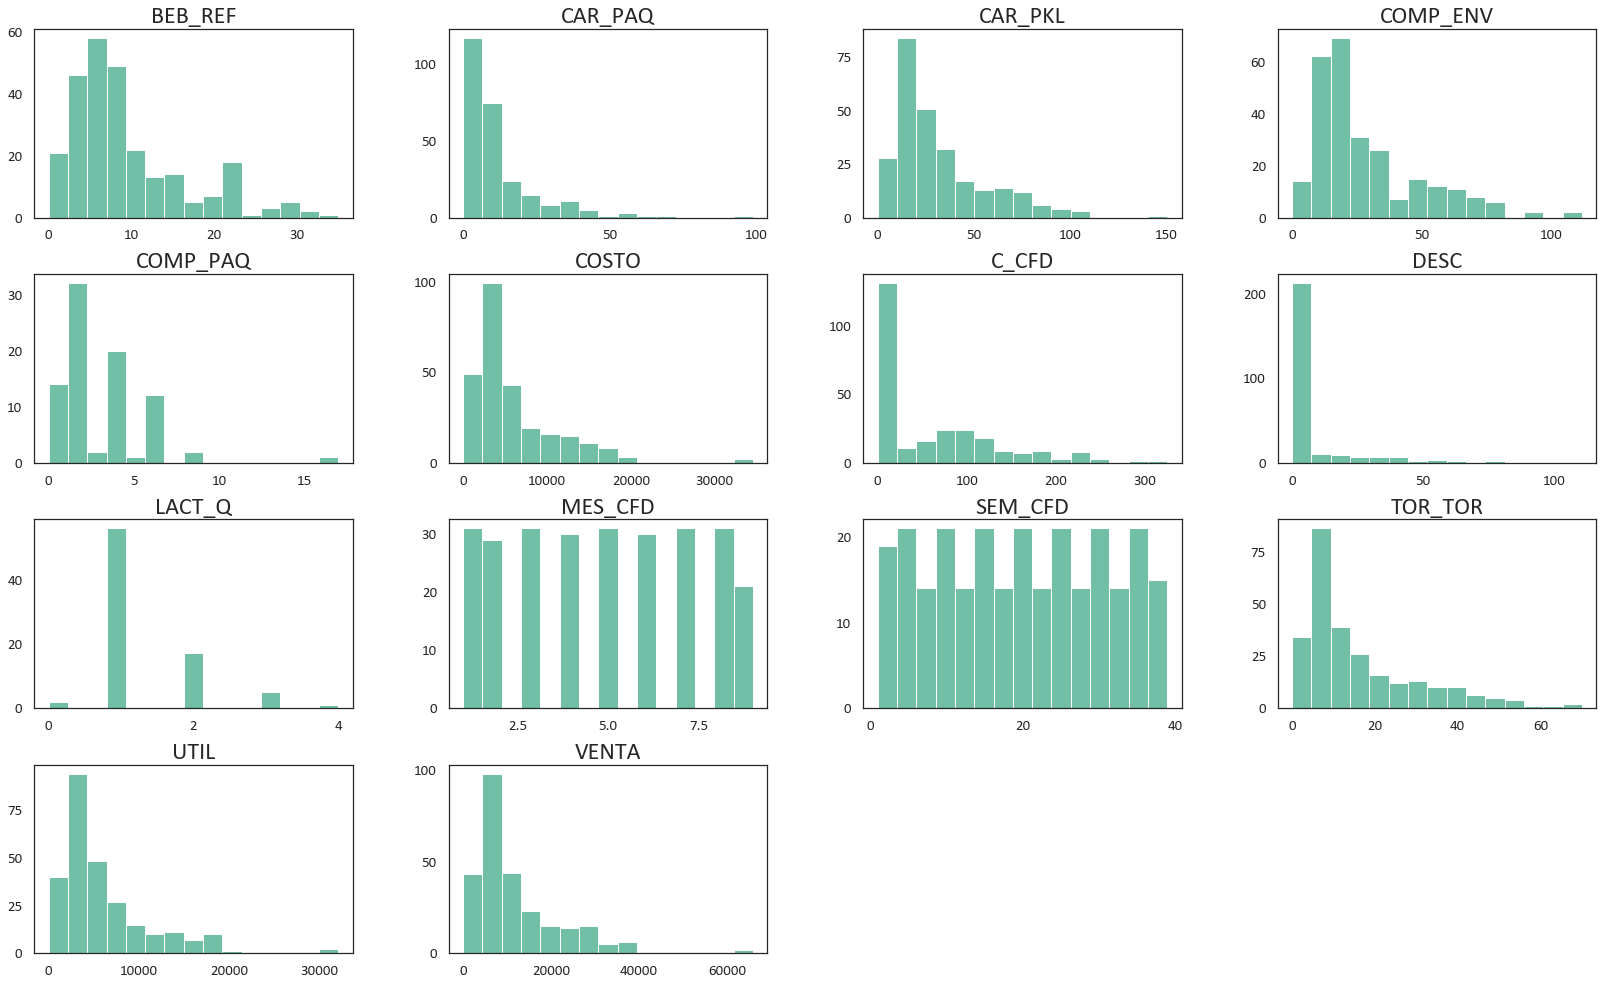

In [20]:
#seaborn font size and style of plot
sns.set( font_scale = 2, style = 'white' )

#matplotlib font type
plt.rc('font', family='calibri')

Analisis_vc.iloc[:,3:].hist( figsize=(28,17), bins=15,
                   xlabelsize = 15, ylabelsize = 15,
                   color = '#72BFA8',
                   grid = False)
plt.show()

### Correlacion de variables

Para este análisis solo se tomarán las variables más importantes, estas son:

1. **CAR_PAQ**
2. **CAR_PKL**
3. **COMP_ENV**
4. **TOR_TOR**
5. **BEB_REF**
6. **VENTA**    
7. **UTIL**   
8. **C_CFD**

La correlación entre estas ocho variables se mostrará a continuación para una mejor perspectiva del problema:

In [39]:
variables = np.array( ['CAR_PAQ','CAR_PKL','COMP_ENV','TOR_TOR','BEB_REF','VENTA','UTIL','C_CFD'] )

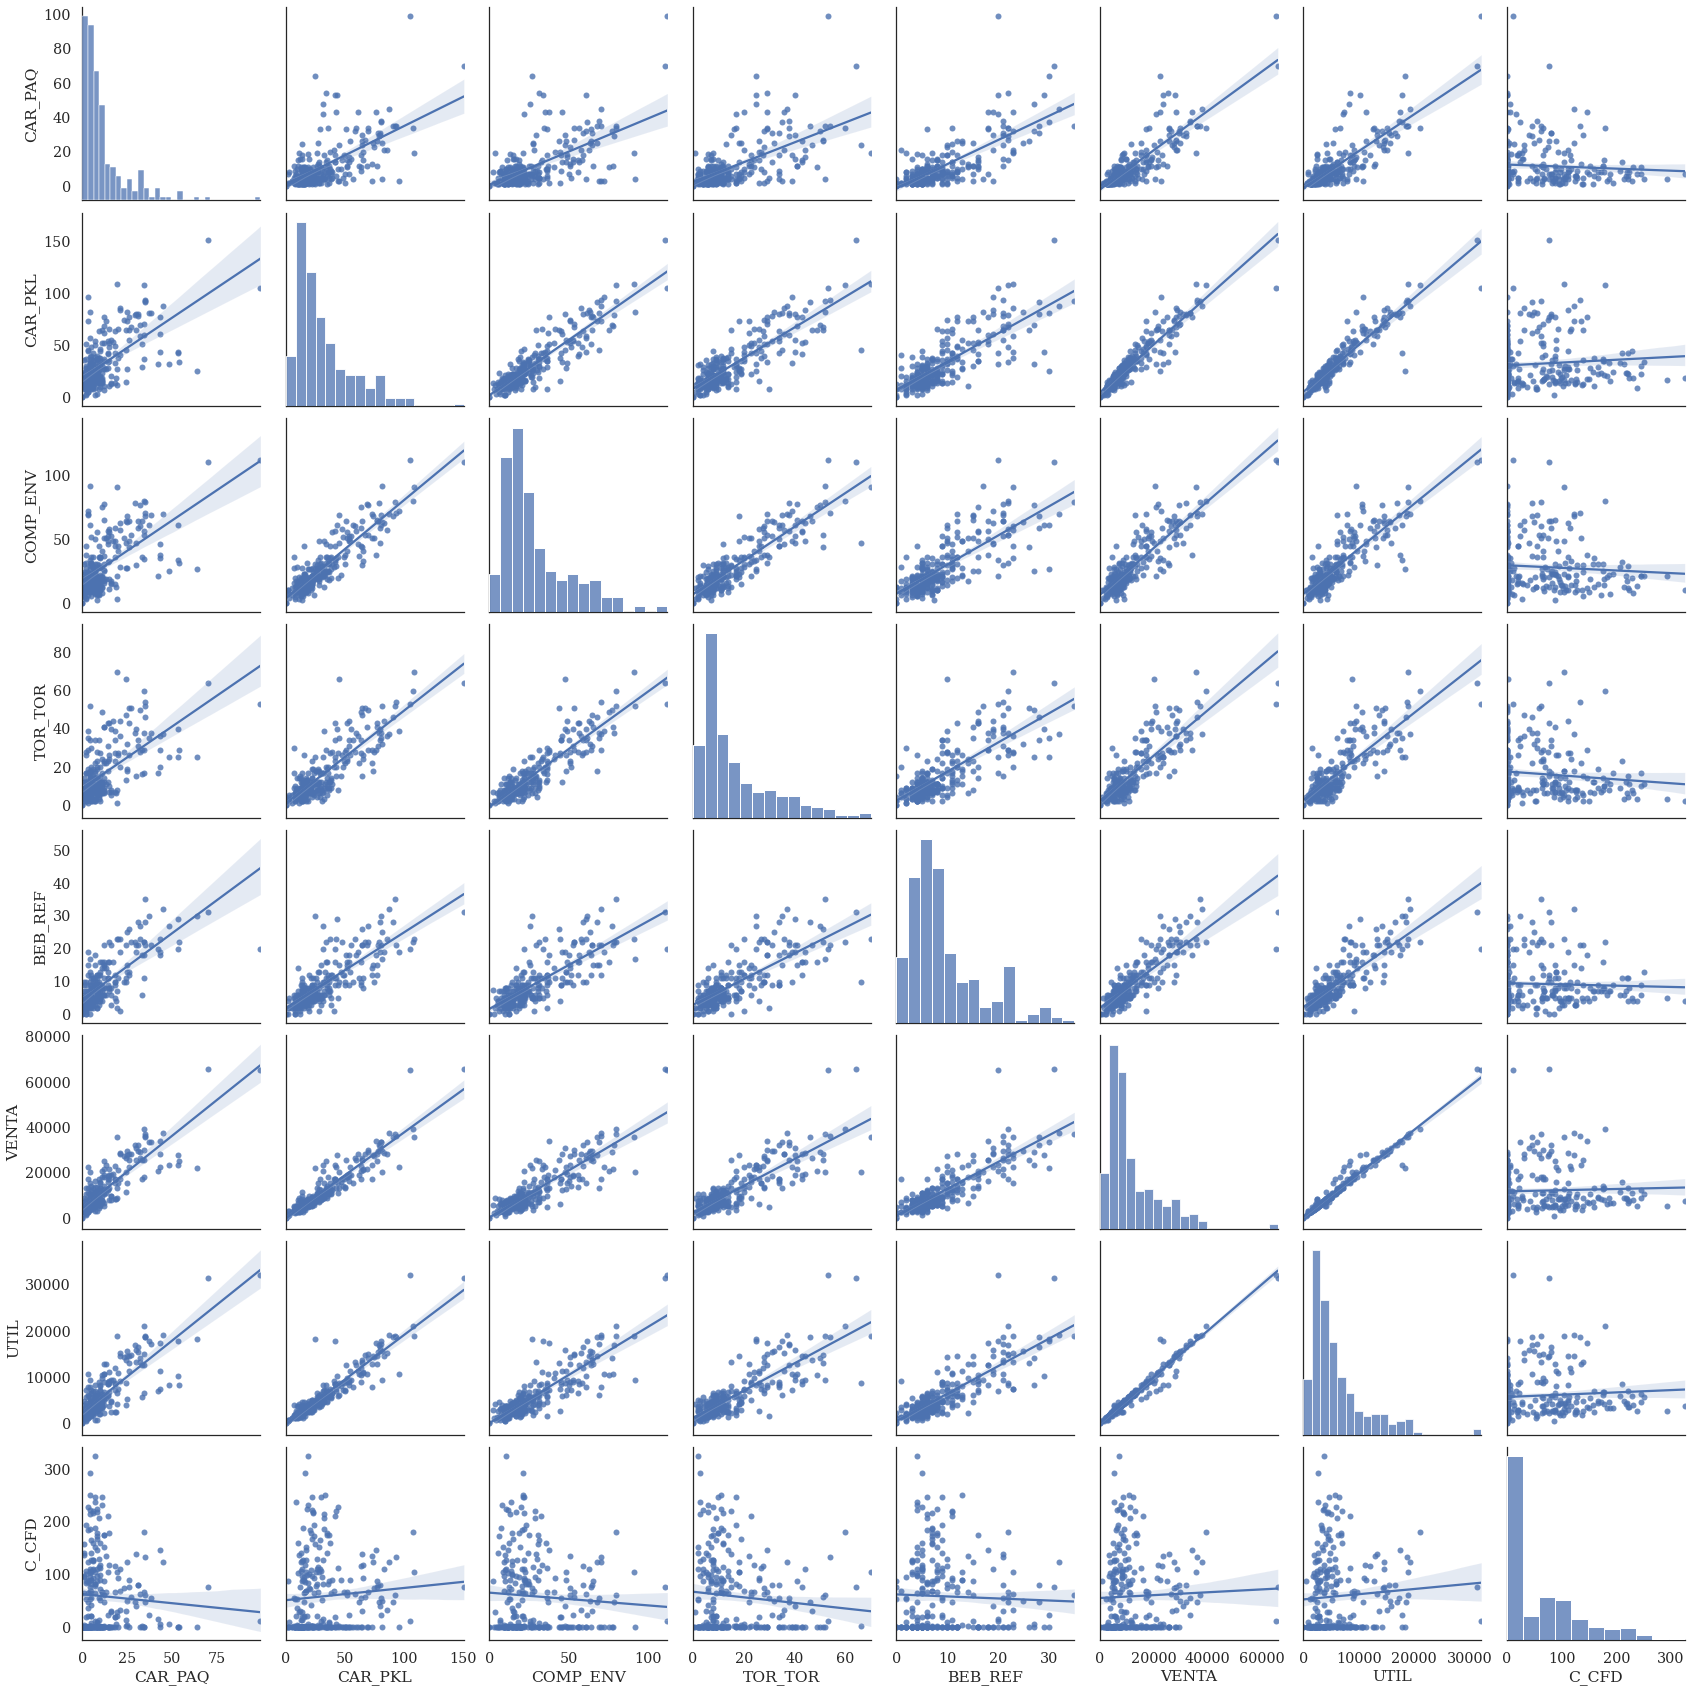

In [22]:
#relative size of the labels on the pairplot
sns.set( font_scale = 1.3, style = 'white' )
plt.rc('font', family='serif')

sns.pairplot(Analisis_vc[ variables ],
             kind = 'reg',
             height= 3.0, aspect=1.0,
            )
plt.show()

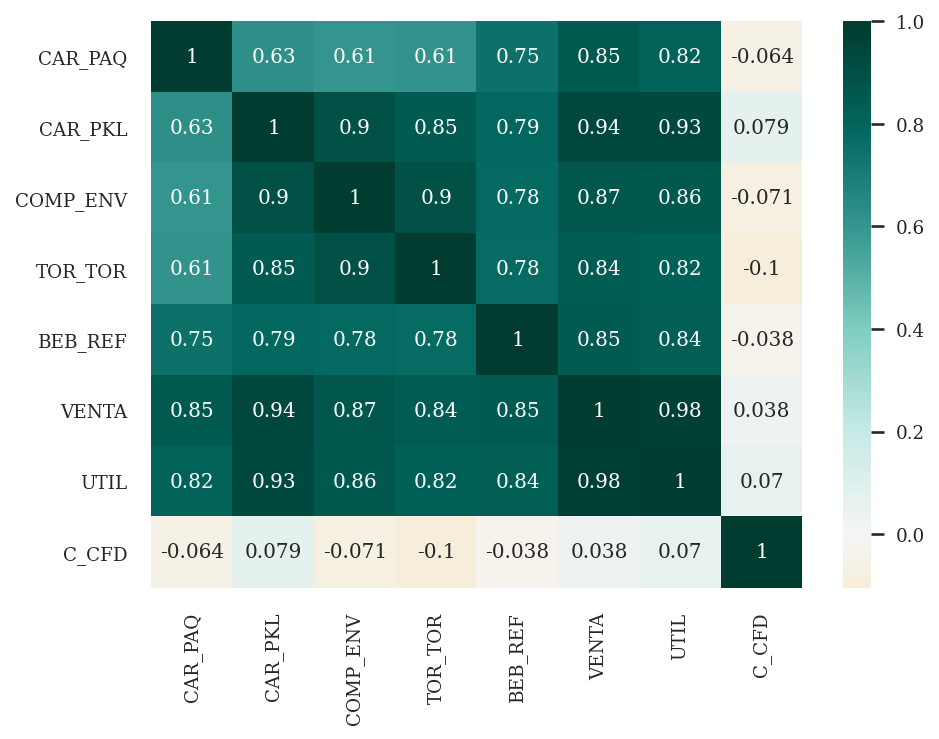

In [23]:
#create a figure to plot
plt.figure( dpi = 150,
           figsize=(7,5)
          )

#create a correlation matrix
corrMatrix = Analisis_vc[variables].corr().round(3)

#relative size of the labels on the heatmap
sns.set( font_scale= 0.8 )
plt.rc('font', family='serif')


#plot the heat map
sns.heatmap( corrMatrix, annot = True , cmap = 'BrBG', center=0 )

#rotate the x and y tiks
plt.xticks( rotation = 90 )
plt.yticks( rotation = 0 )

plt.show()

Se observa que las correlaciones más altas son:

1.* **`CAR_PKL` - `C_CFD` `, `**
2.* **`VENTA`   - `C_CFD` `, `**
3.* **`UTIL`    - `C_CFD` `, `**
4.* **`CAR_PKL` - `VENTA` `, `**
5.* **`UTIL`    - `VENTA` `. `**

Las que se relacionan con la cantidad de casos confirmados por COVID-19, no tienen un porcentaje de correlación bajo.

### Comparativo de ventas Mensuales UBER vs cantidad de casos confirmados COVID 19 acumulado por Mes en Hermosillo, Sonora.

In [24]:
Confirmados_df.head(10)

,MES_CFD,SEM_CFD,F_CFD,C_CFD
0,1,1,01/01/2020,0
1,1,1,02/01/2020,0
2,1,1,03/01/2020,0
3,1,1,04/01/2020,0
4,1,1,05/01/2020,0
5,1,2,06/01/2020,0
6,1,2,07/01/2020,0
7,1,2,08/01/2020,0
8,1,2,09/01/2020,0
9,1,2,10/01/2020,0


In [25]:
cfd_acum_Mes_df = Confirmados_df.groupby(Confirmados_df['MES_CFD']).sum()
cfd_acum_Mes_df.head(10)

,SEM_CFD,C_CFD
MES_CFD,,
1,93,0
2,211,0
3,359,17
4,478,110
5,628,1434
6,740,3225
7,899,5930
8,1036,3416
9,780,1406


In [26]:
# Escribe el __DataFrame__ a CSV
cfd_acum_Mes_df.to_csv('cfd_acum_mes.csv', index=False)

In [27]:
A_cfd_df= pd.read_csv('cfd_acum_mes.csv', encoding='ISO-8859-1')

In [28]:
#import the csv as a Data Frame
V_Uber_mes_df = pd.read_csv('VentaxMes_UBER_Ene_Sept_2020.csv', encoding='ISO-8859-1')
V_Uber_mes_df.head(10)

,U-MES,U-BEB_REF,U-CAR_PAQ,U-CAR_PKL,U-COM_PST,U-COM_PZA,U-COMP_ENV,U-COMP_PZA,U-TOR_TOR,U-VENTA
0,Enero,35,51,23.0,30,19.0,52,26,27,18573
1,Ferbrero,78,33,60.0,26,0.0,36,12,28,24678
2,Marzo,59,121,103.0,8,24.0,60,14,31,41503
3,Abril,62,28,44.2,3,7.0,29,11,39,65137
4,Mayo,36,80,51.6,16,13.6,20,37,30,70093
5,Junio,108,102,180.0,50,93.0,93,32,43,61980
6,Julio,72,21,76.0,41,25.0,36,23,8,40845
7,Agosto,39,57,66.0,16,20.0,6,45,19,67447
8,Septiembre,41,50,27.0,3,25.0,26,5,27,46899


#### Observaciones Generales

In [29]:
#number of columns and rows 
V_Uber_mes_df.shape

(9, 10)

In [30]:
#name of the columns
V_Uber_mes_df.values

array([['Enero', 35, 51, 23.0, 30, 19.0, 52, 26, 27, 18573],
       ['Ferbrero', 78, 33, 60.0, 26, 0.0, 36, 12, 28, 24678],
       ['Marzo', 59, 121, 103.0, 8, 24.0, 60, 14, 31, 41503],
       ['Abril', 62, 28, 44.2, 3, 7.0, 29, 11, 39, 65137],
       ['Mayo', 36, 80, 51.6, 16, 13.6, 20, 37, 30, 70093],
       ['Junio', 108, 102, 180.0, 50, 93.0, 93, 32, 43, 61980],
       ['Julio', 72, 21, 76.0, 41, 25.0, 36, 23, 8, 40845],
       ['Agosto', 39, 57, 66.0, 16, 20.0, 6, 45, 19, 67447],
       ['Septiembre', 41, 50, 27.0, 3, 25.0, 26, 5, 27, 46899]],
      dtype=object)

In [31]:
#type of data we have
V_Uber_mes_df.dtypes

U-MES          object
U-BEB_REF       int64
U-CAR_PAQ       int64
U-CAR_PKL     float64
U-COM_PST       int64
U-COM_PZA     float64
U-COMP_ENV      int64
U-COMP_PZA      int64
U-TOR_TOR       int64
U-VENTA         int64
dtype: object

### Se procedera a concatenar los data frame de V_Uber_mes_df y A_cfd_df

In [32]:
A_ucfd = pd.concat([V_Uber_mes_df, A_cfd_df], axis=1)
A_ucfd.head(10)

,U-MES,U-BEB_REF,U-CAR_PAQ,U-CAR_PKL,U-COM_PST,U-COM_PZA,U-COMP_ENV,U-COMP_PZA,U-TOR_TOR,U-VENTA,SEM_CFD,C_CFD
0,Enero,35,51,23.0,30,19.0,52,26,27,18573,93,0
1,Ferbrero,78,33,60.0,26,0.0,36,12,28,24678,211,0
2,Marzo,59,121,103.0,8,24.0,60,14,31,41503,359,17
3,Abril,62,28,44.2,3,7.0,29,11,39,65137,478,110
4,Mayo,36,80,51.6,16,13.6,20,37,30,70093,628,1434
5,Junio,108,102,180.0,50,93.0,93,32,43,61980,740,3225
6,Julio,72,21,76.0,41,25.0,36,23,8,40845,899,5930
7,Agosto,39,57,66.0,16,20.0,6,45,19,67447,1036,3416
8,Septiembre,41,50,27.0,3,25.0,26,5,27,46899,780,1406


### A continuación se muestra un resumen estadístico de los datos.

In [33]:
#descripción estadística de los datos numéricos
A_ucfd.describe()

,U-BEB_REF,U-CAR_PAQ,U-CAR_PKL,U-COM_PST,U-COM_PZA,U-COMP_ENV,U-COMP_PZA,U-TOR_TOR,U-VENTA,SEM_CFD,C_CFD
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,58.888889,60.333333,70.088889,21.444444,25.177778,39.777778,22.777778,28.000000,48572.777778,580.444444,1726.444444
std,24.415387,34.183329,47.962393,16.629124,26.843704,25.635804,13.414337,10.259142,18897.526973,318.232270,2075.291191
min,35.000000,21.000000,23.000000,3.000000,0.000000,6.000000,5.000000,8.000000,18573.000000,93.000000,0.000000
25%,39.000000,33.000000,44.200000,8.000000,13.600000,26.000000,12.000000,27.000000,40845.000000,359.000000,17.000000
50%,59.000000,51.000000,60.000000,16.000000,20.000000,36.000000,23.000000,28.000000,46899.000000,628.000000,1406.000000
75%,72.000000,80.000000,76.000000,30.000000,25.000000,52.000000,32.000000,31.000000,65137.000000,780.000000,3225.000000
max,108.000000,121.000000,180.000000,50.000000,93.000000,93.000000,45.000000,43.000000,70093.000000,1036.000000,5930.000000


### Distribucion de los datos

Como parte del análisis, la distribución de las variables se mostrará mediante histogramas.

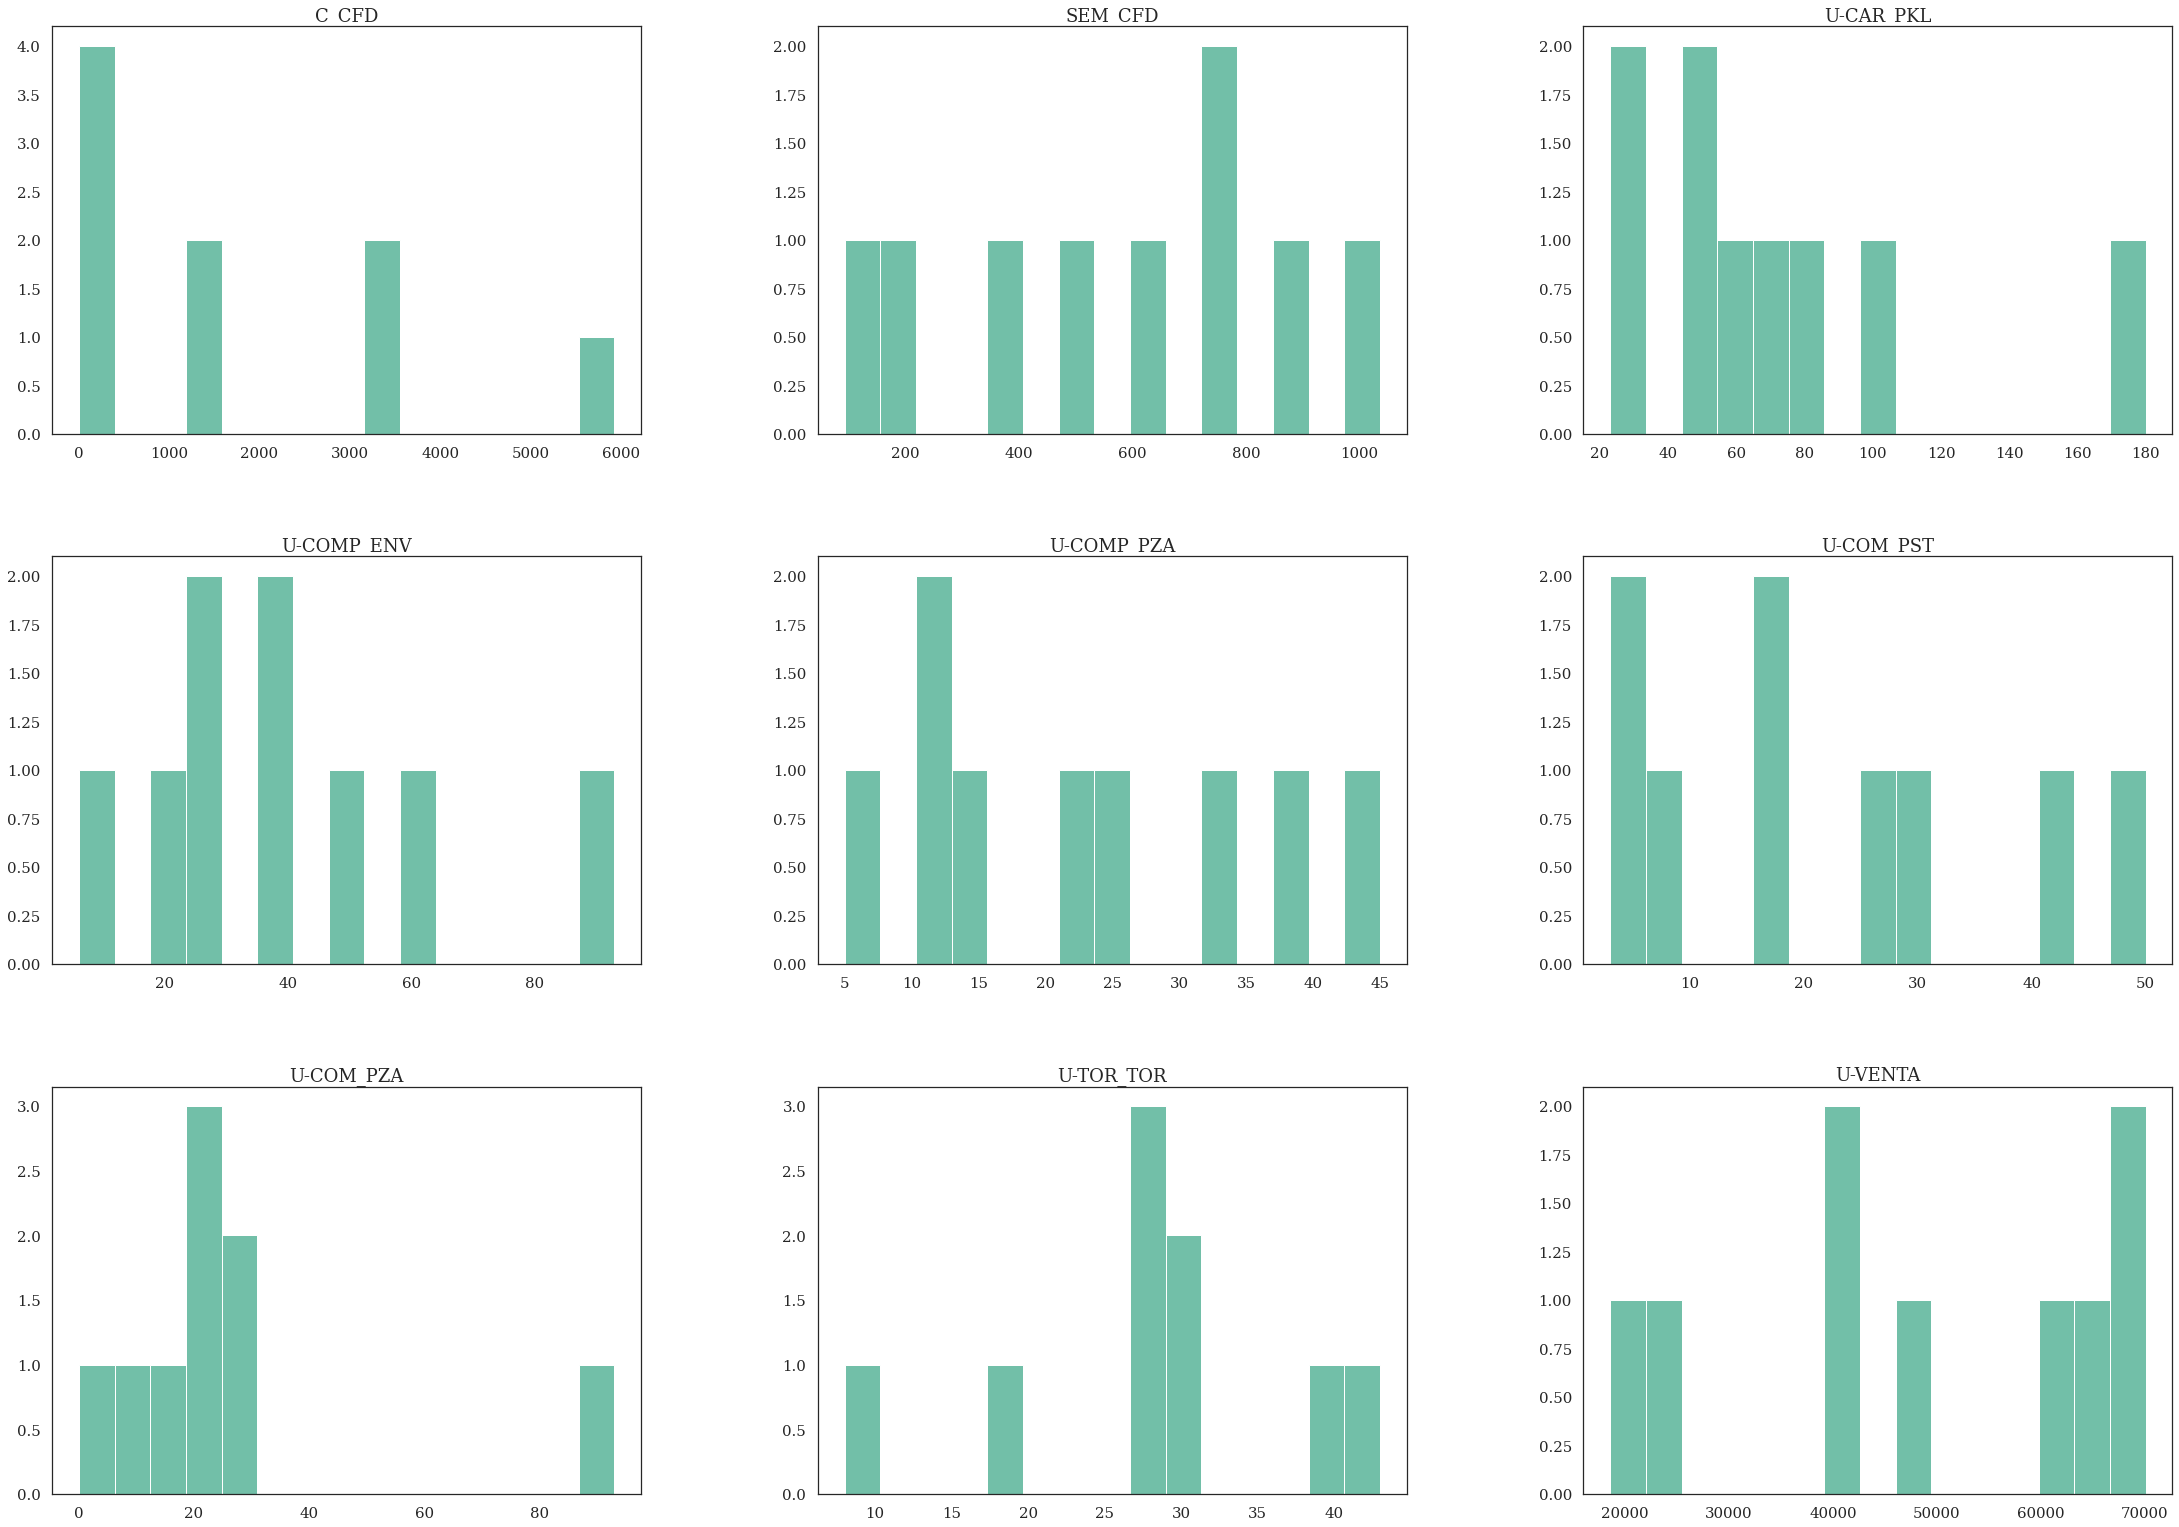

In [34]:
#seaborn font size and style of plot
sns.set( font_scale = 1.5, style = 'white' )

#matplotlib font type
plt.rc('font', family='serif')

A_ucfd.iloc[:,3:].hist( figsize=(38,27), bins=15,
                   xlabelsize = 15, ylabelsize = 15,
                   color = '#72BFA8',
                   grid = False)
plt.show()

### Correlacion de variables

Para este análisis solo se tomarán las variables más importantes, estas son:

1. **U-CAR_PAQ**
2. **U-CAR_PKL**
3. **U-COMP_ENV**
4. **U-TOR_TOR**
5. **U-BEB_REF**
6. **U-VENTA**
7. **C_CFD**

La correlación entre estas ocho variables se mostrará a continuación para una mejor perspectiva del problema:

In [35]:
variables = np.array( ['U-CAR_PAQ','U-CAR_PKL','U-COMP_ENV','U-TOR_TOR','U-BEB_REF','U-VENTA','C_CFD'] )

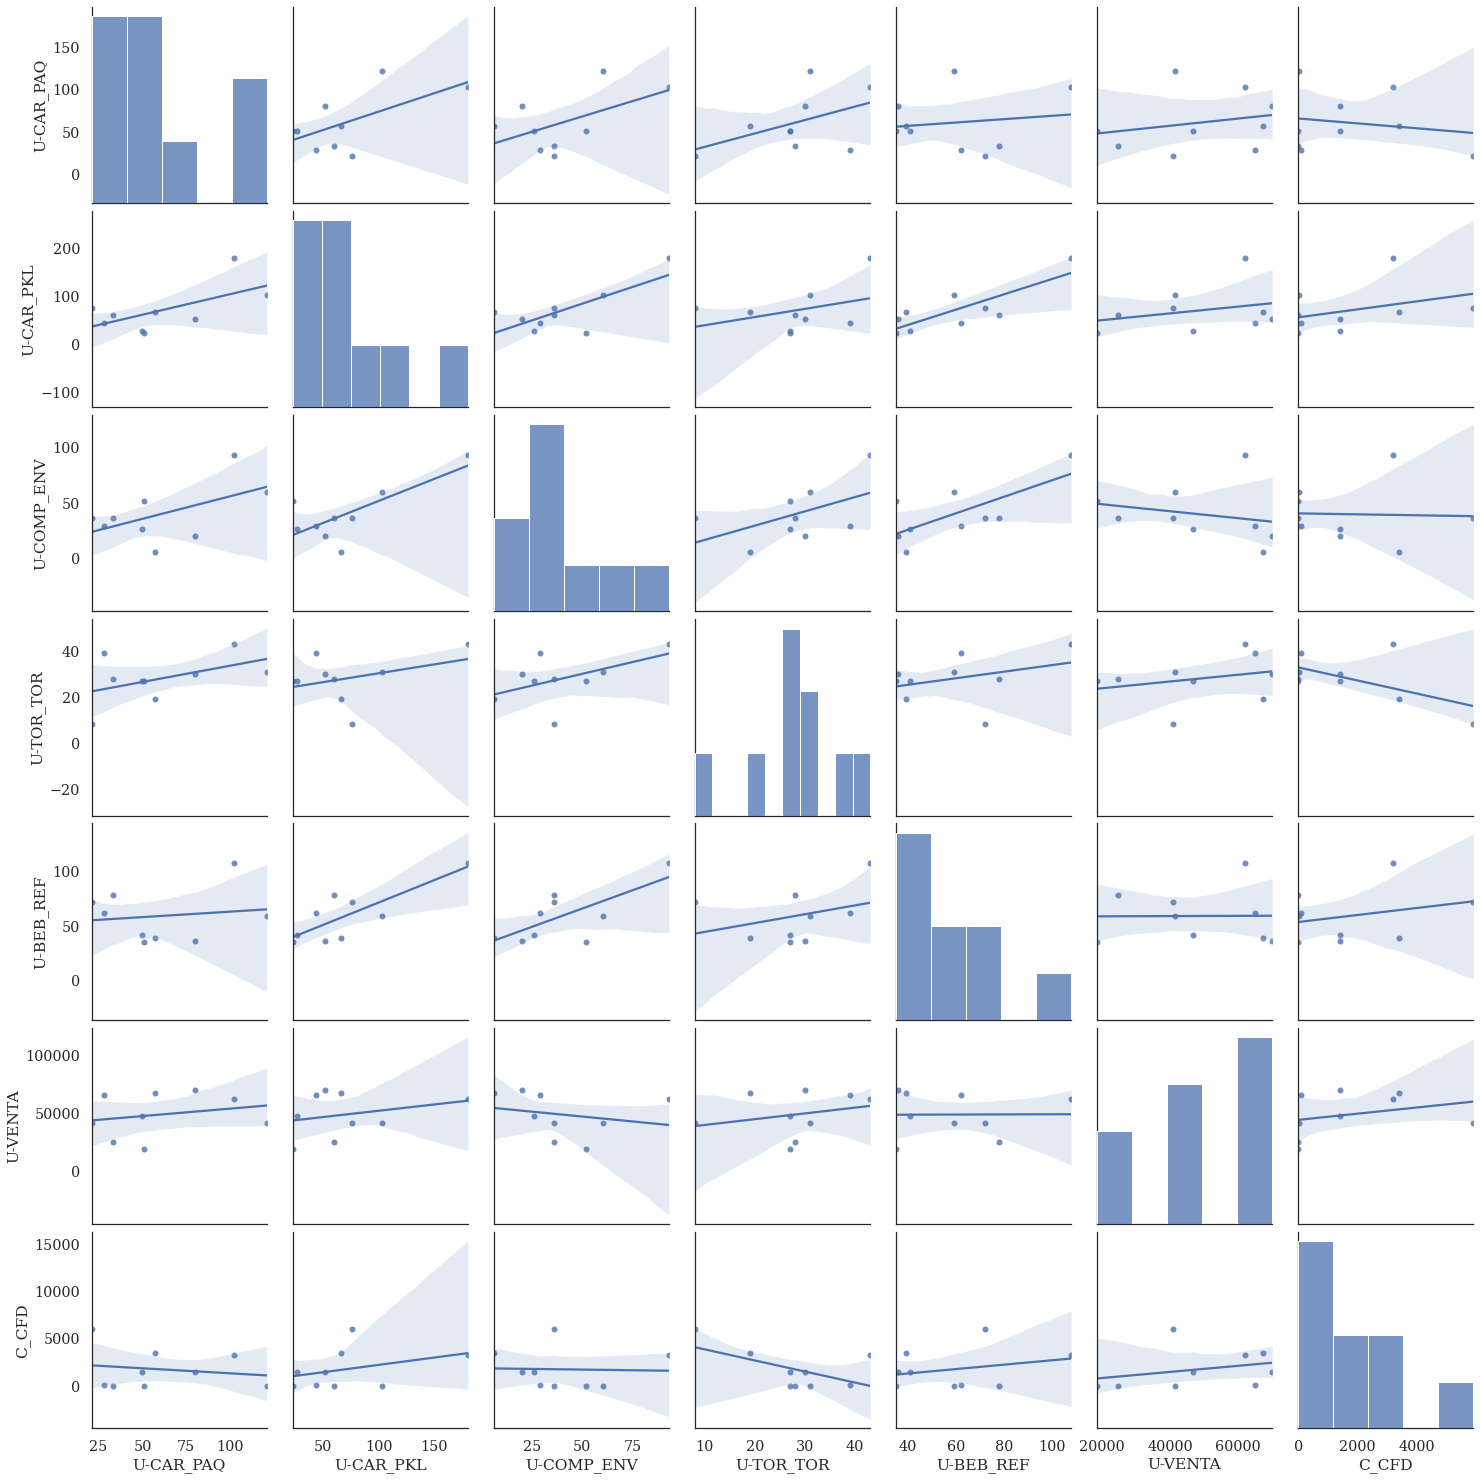

In [36]:
#relative size of the labels on the pairplot
sns.set( font_scale = 1.3, style = 'white' )
plt.rc('font', family='serif')

sns.pairplot(A_ucfd[ variables ],
             kind = 'reg',
             height= 3.0, aspect=1.0,
            )
plt.show()

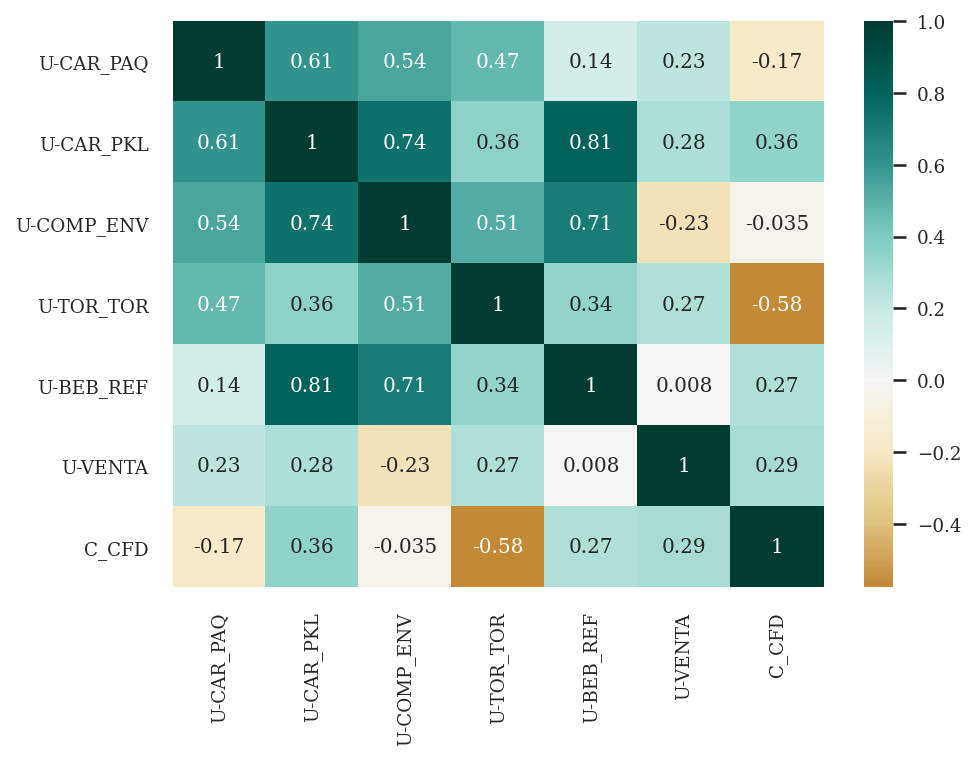

In [37]:
#create a figure to plot
plt.figure( dpi = 150,
           figsize=(7,5)
          )

#create a correlation matrix
corrMatrix = A_ucfd[variables].corr().round(3)

#relative size of the labels on the heatmap
sns.set( font_scale= 0.8 )
plt.rc('font', family='serif')


#plot the heat map
sns.heatmap( corrMatrix, annot = True , cmap = 'BrBG', center=0 )

#rotate the x and y tiks
plt.xticks( rotation = 90 )
plt.yticks( rotation = 0 )

plt.show()

Se observa que las correlaciones más altas son:

1.* **`U-CAR_PKL` - `C_CFD``, `**
2.* **`U-BEB_REF` - `C_CFD``, `**
3.* **`U-VENTA`   - `C_CFD``, `**
4.* **`U-CAR_PKL` - `VENTA``, `**
5.* **`U-CAR_PAQ` - `VENTA``. `**
6.* **`U-TOR_TOR` - `VENTA``. `**

Las que se relacionan con la cantidad de casos confirmados por COVID-19, tienen un porcentaje de correlación 36 %, 29 %, 27 %.